## Linear Regression


In supervised learning, the goal is to learn a function f : X → Y given data so that f(x) is a “good” predictor for the corresponding value of y. When the target variable that we’re trying to predict is continuous, the learning problem becomes a regression problem. 

Linear regression consists of a family of linear techniques to build regression models. In a univariate regression, a regression line describes how a response variable linearly changes as explanatory variable changes. In higher dimensions with multiple explanatory variables, linear regression problem amounts to finding a plane or a hyper-plane. 

### Ordinary least squares regression

**Note:** _We will not be covering all the nuances of least squares regression including the underlying assumptions, which are critical when the meaning(interpretability) of the model coefficients are desired.  We are just treating the linear regression here as another data mining algorithm in order to set the foundation for discussion of machine learning techniques._


Linear regression between a continuously valued response (target variable y) and a set of explanatory variables (x0, x1, x2…...xm) can be defined as follows:

![](../files/eq1.png)

,where b is the y-axis intercept, and w<sup>1</sup> ... w<sup>m</sup> are the coefficients of the corresponding explanatory variables. The goal of a learning algorithm is to learn the set of coefficients or weights that best describe the linear relationship between X and y variables in the training data that can be accurately used to predict the value of y in future data.

When the best line is determined using a technique called least square, the linear regression is known as the least square regression or ordinary least square regression. The least square regression fitting procedure involves a cost function, known as residual sum of squares or RSS of the differences between true y value and estimated values. 

![](../files/loss.png)

The coefficients are chosen, such that they minimize this cost function.

**Note:** _It is common in machine learning to refer to the error between yhat and y of a single training observation as `loss function`, and the cumulative error over the entire dataset as `cost function`._

![](../files/argmin.png)

The least square problem can be analytically solved with the following equation:

![](../files/xtx.png)

However, when there are a very large number of predictor variables in the order of tens of thousands, optimization algorithms such as gradient descent provide faster and stable solutions to the least square problems. 


### Linear regression with regularization

When there are a large number of explanatory variables, a supervised learning problem tends to suffer from overfitting. Overfitting happens when a model in consideration works perfectly with training data but is unable to generalise to unseen datasets. 

Regularisation is a process of adding a penalty term that shrinks the weight parameters towards zero in order to prevent overfitting. The regularisation terms are ‘constraints’ by which an optimisation algorithm must ‘adhere to’ when minimising the loss function, apart from having to minimise the error between the true y and the predicted ŷ.

### Ridge regression

Ridge regression  adds “square  value of magnitude” of weight parameters (L2 norm) to the loss function of a model to regularize a linear regression.

![](../files/ridge-loss.png)

The loss function is modified by adding the shrinkage quantity as a penalty term.  The weight parameters are then estimated by minimizing the modified loss function. λ is the tuning parameter that decides how much we want to penalize the flexibility of our model. Greater the value of the lambda, more shrinkage would occur and the weight parameter tends to take small values leading to less overfitting. However, if lambda is very large then it will introduce bias (underfitting). Ridge regression is sensitive to scale and hence requires all explanatory variables to be in a similar scale.

#### Lasso regression 

LASSO  adds “absolute value of magnitude” of weight parameters (L1 norm) scaled by a regularization parameter as penalty term to the loss function.

![](../files/lasso-loss.png)

Lasso regression tends to shrink the weight of less important features to zero, thereby removing some features altogether. Ridge regression on the other hand tends to minimize the larger weight parameter into small values due to the squared term in the loss function.

In [54]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [27]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [37]:
df = pd.DataFrame(X)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', "AGE","DIS", "RAD",'TAX','PTRATIO', 'B', "LSTAT"]
df['MEDV'] = y

In [80]:
#print(load_boston()['DESCR'])

### Graphical summary of the relationships in a dataset

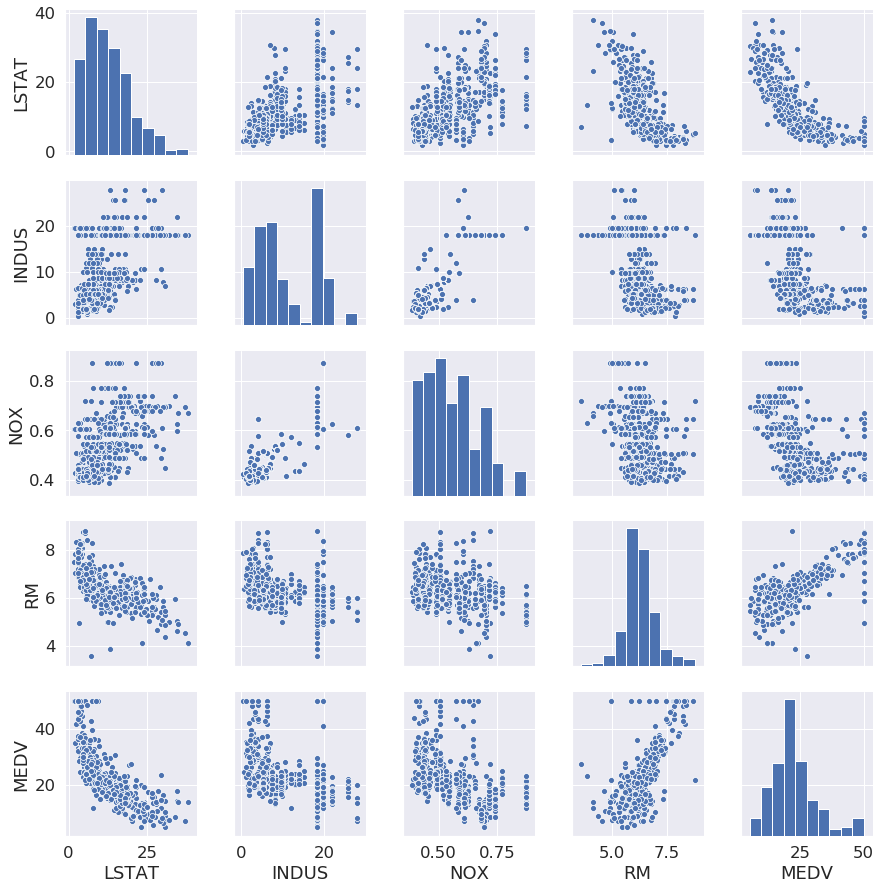

In [81]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols])

the scatterplot shows the linear relationship between room numbers RM and the housing prices MEDV

MEDV seems to be normally distributed but with some exteme observations in the right

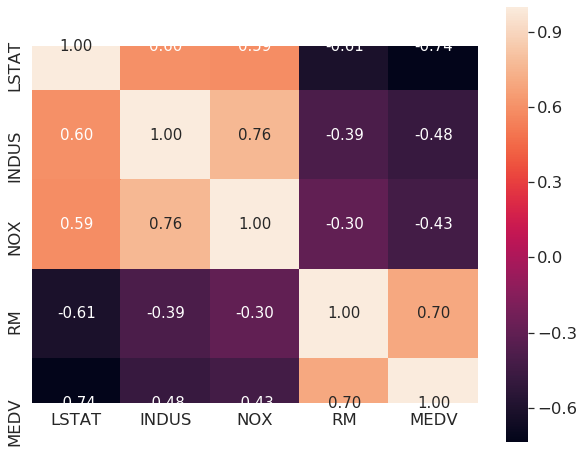

In [49]:
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 15},
                yticklabels = cols,
                xticklabels = cols,
                )

In [50]:
#correlation_matrix = df.corr().round(2)
#sns.heatmap(correlation_matrix, cmap="YlGnBu")

We can use train_test_split class from model_selection module of sklearn to split the dataset into training and testing.

In [82]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [64]:
from sklearn.linear_model import LinearRegression

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:

 **_Note_** Statsmodel package also provides OLS regression API that provides complete results for interpretation of the practical and statistical significance of coefficients. I would encourage your to use statsmodel API if you are fitting a linear model in your final project.


#### Some Optional Parameters of the linearregression class of sklearn

fit_interceptbool,  default True: Whether to calculate the intercept for this model.

normalizebool, default False:  If True, the regressors X will be normalized 

copy_Xbool, default True If True: X will be copied; else, it may be overwritten.

n_jobsint or None, (default=None): The number of parallel jobs to use for the computation. 

Text(0, 0.5, 'Predicted')

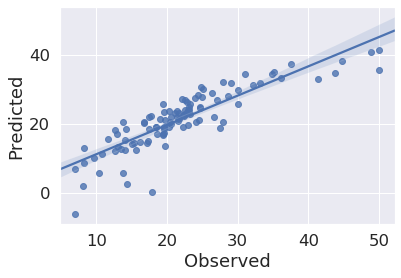

In [99]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
sns.regplot(Y_test, Y_pred)
plt.xlabel("Observed")
plt.ylabel("Predicted")

In [92]:
# The coefficients of the model can be obtained with `coef_` attribute of the class:
reg.coef_

array([-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,  2.70536624e+00,
       -1.59570504e+01,  3.41397332e+00,  1.11887670e-03, -1.49308124e+00,
        3.64422378e-01, -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
       -5.94076089e-01])

In [97]:
# Coefficient of determination of model ( model-rsqare)
print (reg.score(X_train,Y_train))
print (reg.score(X_test,Y_test))

0.7383393920590519
0.7334492147453084


In [88]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
rsq = sklearn.metrics.r2_score(Y_test, Y_pred)
print(mse)
print(rsq)

20.86929218377075
0.7334492147453084


Ridge regression can be performed with sklearn.linear_model.Ridge¶class. The major parameter is `alpha`, which is the regularization parameter and that we refered to as lambda in the above discussion of ridge regression. Experiment with the alpha parameter and see how the training and testing accuracies vary.


In [143]:
from sklearn.linear_model import Ridge
rsq = list()
alphas = np.linspace(0.01, 1, num=20)
for alpha in alphas:
    reg_ridge = Ridge(alpha=alpha)
    reg_ridge.fit(X, y)
    rsq.append(reg_ridge.score(X_test,Y_test))


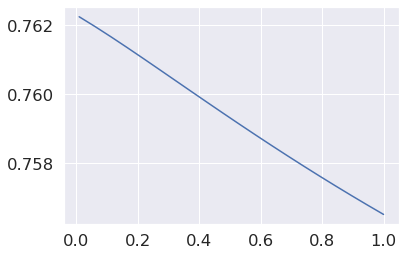

In [144]:
plt.plot(alphas,rsq)

Lasso regression can be performed with sklearn.linear_model.Lasso¶class. As with ridge, the major parameter is `alpha`. Experiment with the alpha paramter and see how the training and testing accuracy changes.

In [141]:
from sklearn.linear_model import Lasso
rsq = list()
alphas = np.linspace(0.001, 1, num=20)
for alpha in alphas:
    reg_lasso = Lasso(alpha=alpha)
    reg_lasso.fit(X, y)
    rsq.append(reg_lasso.score(X_test,Y_test))

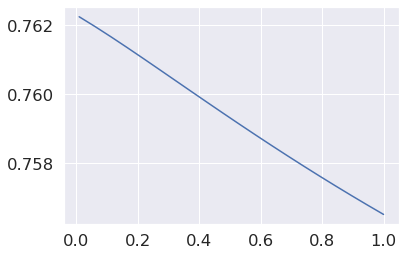

In [153]:
plt.plot(alphas,rsq)

In [170]:
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(X, y)
reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(X, y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

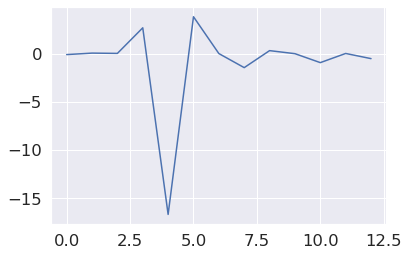

In [171]:
plt.plot(reg_ridge.coef_, color = 'b')


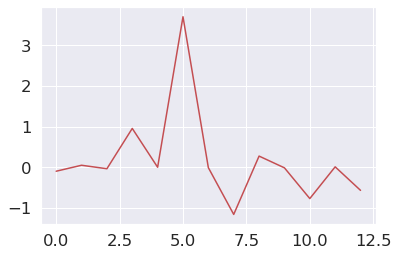

In [172]:
plt.plot(reg_lasso.coef_, color = "r")